In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential #to create a model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from PIL import Image
import glob
import os, shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import seaborn as sns
import visualkeras
from PIL import ImageFont
from tensorflow.keras.layers import BatchNormalization


In [3]:
cinic_dir = 'D:/MDS/2023/4th Tri-3/DLF/Ass2/DS_10283_3192'
traindir = cinic_dir + '/train'
validatedir = cinic_dir + '/valid'
testdir = cinic_dir + '/test'

In [19]:
img_height,img_width=180,180
batch_size=128

#Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_ds_augmented = datagen.flow_from_directory(
    traindir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  validatedir,
  label_mode="categorical",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  testdir,
  label_mode="categorical",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 90000 images belonging to 10 classes.
Found 90000 files belonging to 10 classes.
Found 90000 files belonging to 10 classes.


In [20]:
vgg_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(32,32,3),
                   pooling='avg',classes=10,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

    
vgg_model.add(pretrained_model)
vgg_model.add(BatchNormalization())
vgg_model.add(Flatten())
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(BatchNormalization())
vgg_model.add(Dropout(0.2))
vgg_model.add(Dense(10, activation='softmax'))


for l, layer in enumerate(vgg_model.layers[-2:]):
    layer.trainable = True


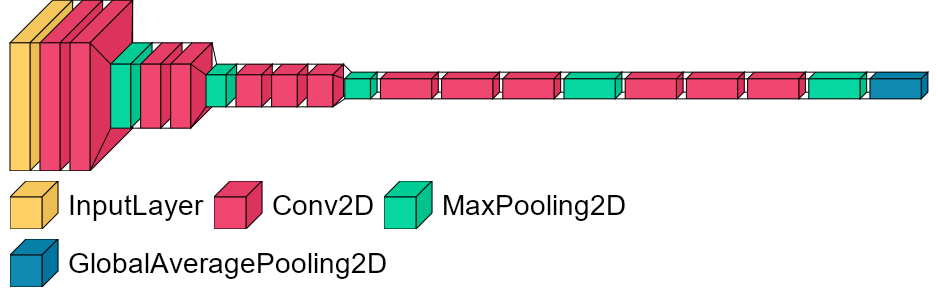

In [21]:
font = ImageFont.truetype("arial.ttf", 28)  # using comic sans is strictly prohibited!
# Print the network architecture with legend using visualkeras
visualkeras.layered_view(pretrained_model, legend=True, font=font)

In [7]:
# pretrained_model_with = tf.keras.applications.VGG16(include_top=True,
#                    input_shape=(224, 224, 3),
#                    pooling='avg',
#                    weights='imagenet')
# font = ImageFont.truetype("arial.ttf", 28)  # using comic sans is strictly prohibited!
# # Print the network architecture with legend using visualkeras
# visualkeras.layered_view(pretrained_model_with, legend=True, font=font)

In [8]:
pretrained_model_with.summary()

NameError: name 'pretrained_model_with' is not defined

In [22]:
pretrained_model.summary()
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 180, 180, 64)      1792      
                                                                 
 conv2d_40 (Conv2D)          (None, 180, 180, 64)      36928     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 90, 90, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_41 (Conv2D)          (None, 90, 90, 128)       73856     
                                                                 
 conv2d_42 (Conv2D)          (None, 90, 90, 128)       147584    
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 45, 45, 128)       0         
 ng2D)                                                

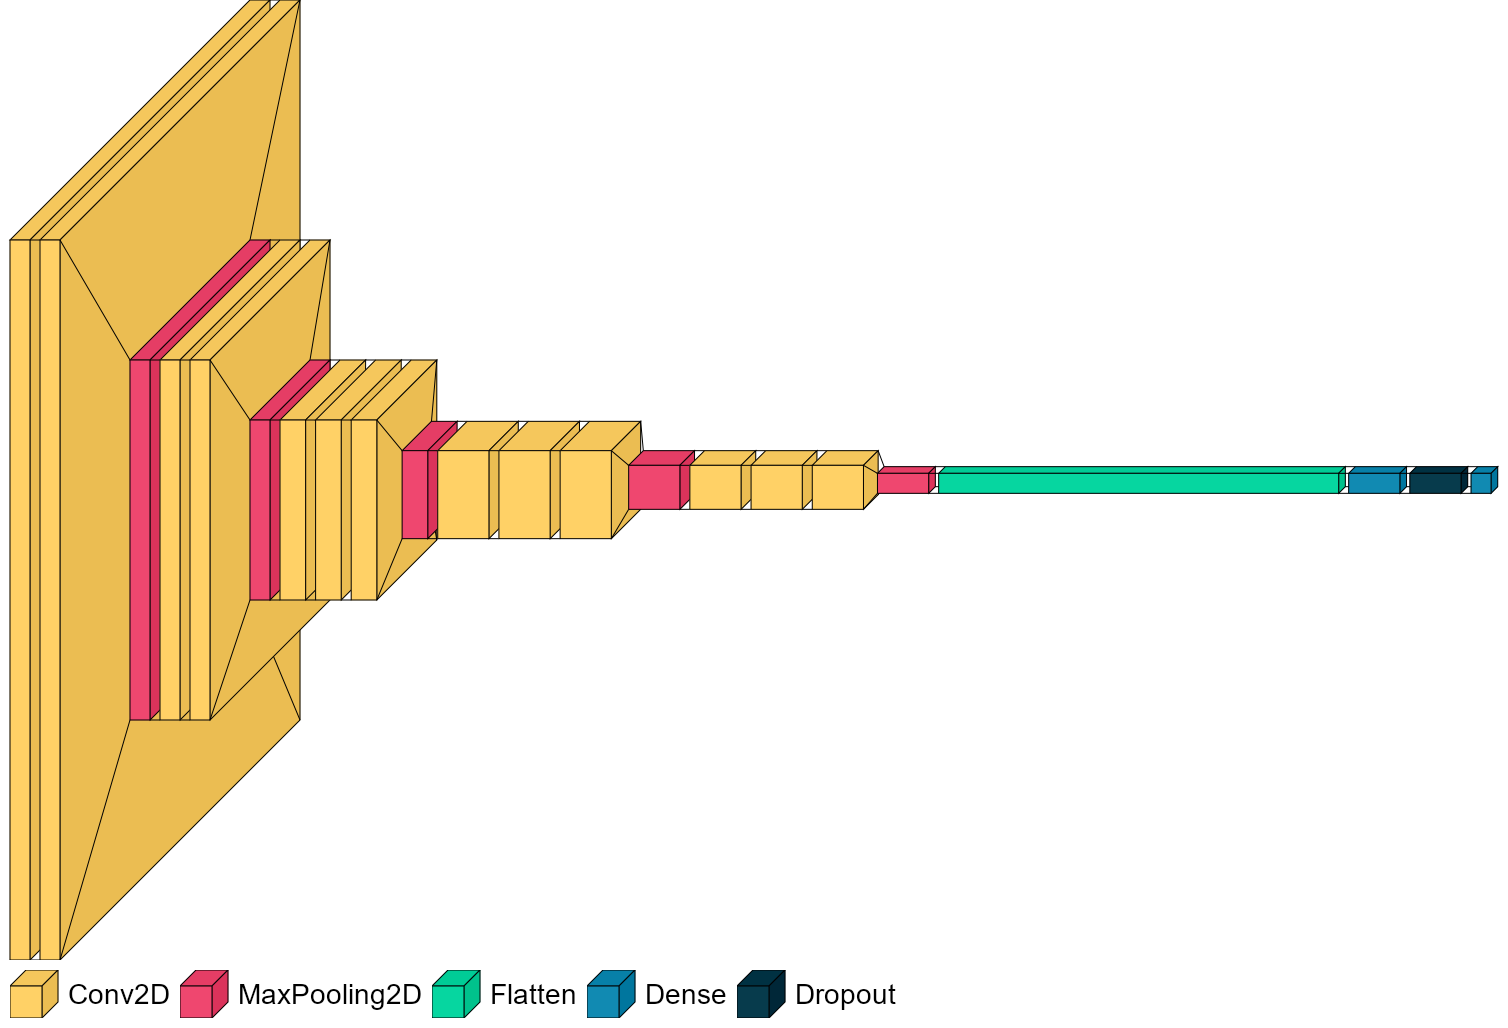

In [28]:
from collections import defaultdict


import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

# Define the model architecture
vis_model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(180, 180, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
 
])

# Print the model summary
vis_model.summary()

font = ImageFont.truetype("arial.ttf", 28)  # using comic sans is strictly prohibited!
# Print the network architecture with legend using visualkeras
visualkeras.layered_view(vis_model, legend=True, font=font)

In [23]:
vgg_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 batch_normalization_2 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization_3 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 512)              

In [24]:
vgg_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
import time
from tensorflow.keras.callbacks import EarlyStopping

start_time = time.time()
es = EarlyStopping(monitor='val_loss', mode='max', patience=5, restore_best_weights=True)
history = vgg_model.fit(train_ds_augmented, validation_data=val_ds, epochs=20, callbacks=[es])
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/20


: 

1/1 [==============================] - 0s 129ms/step


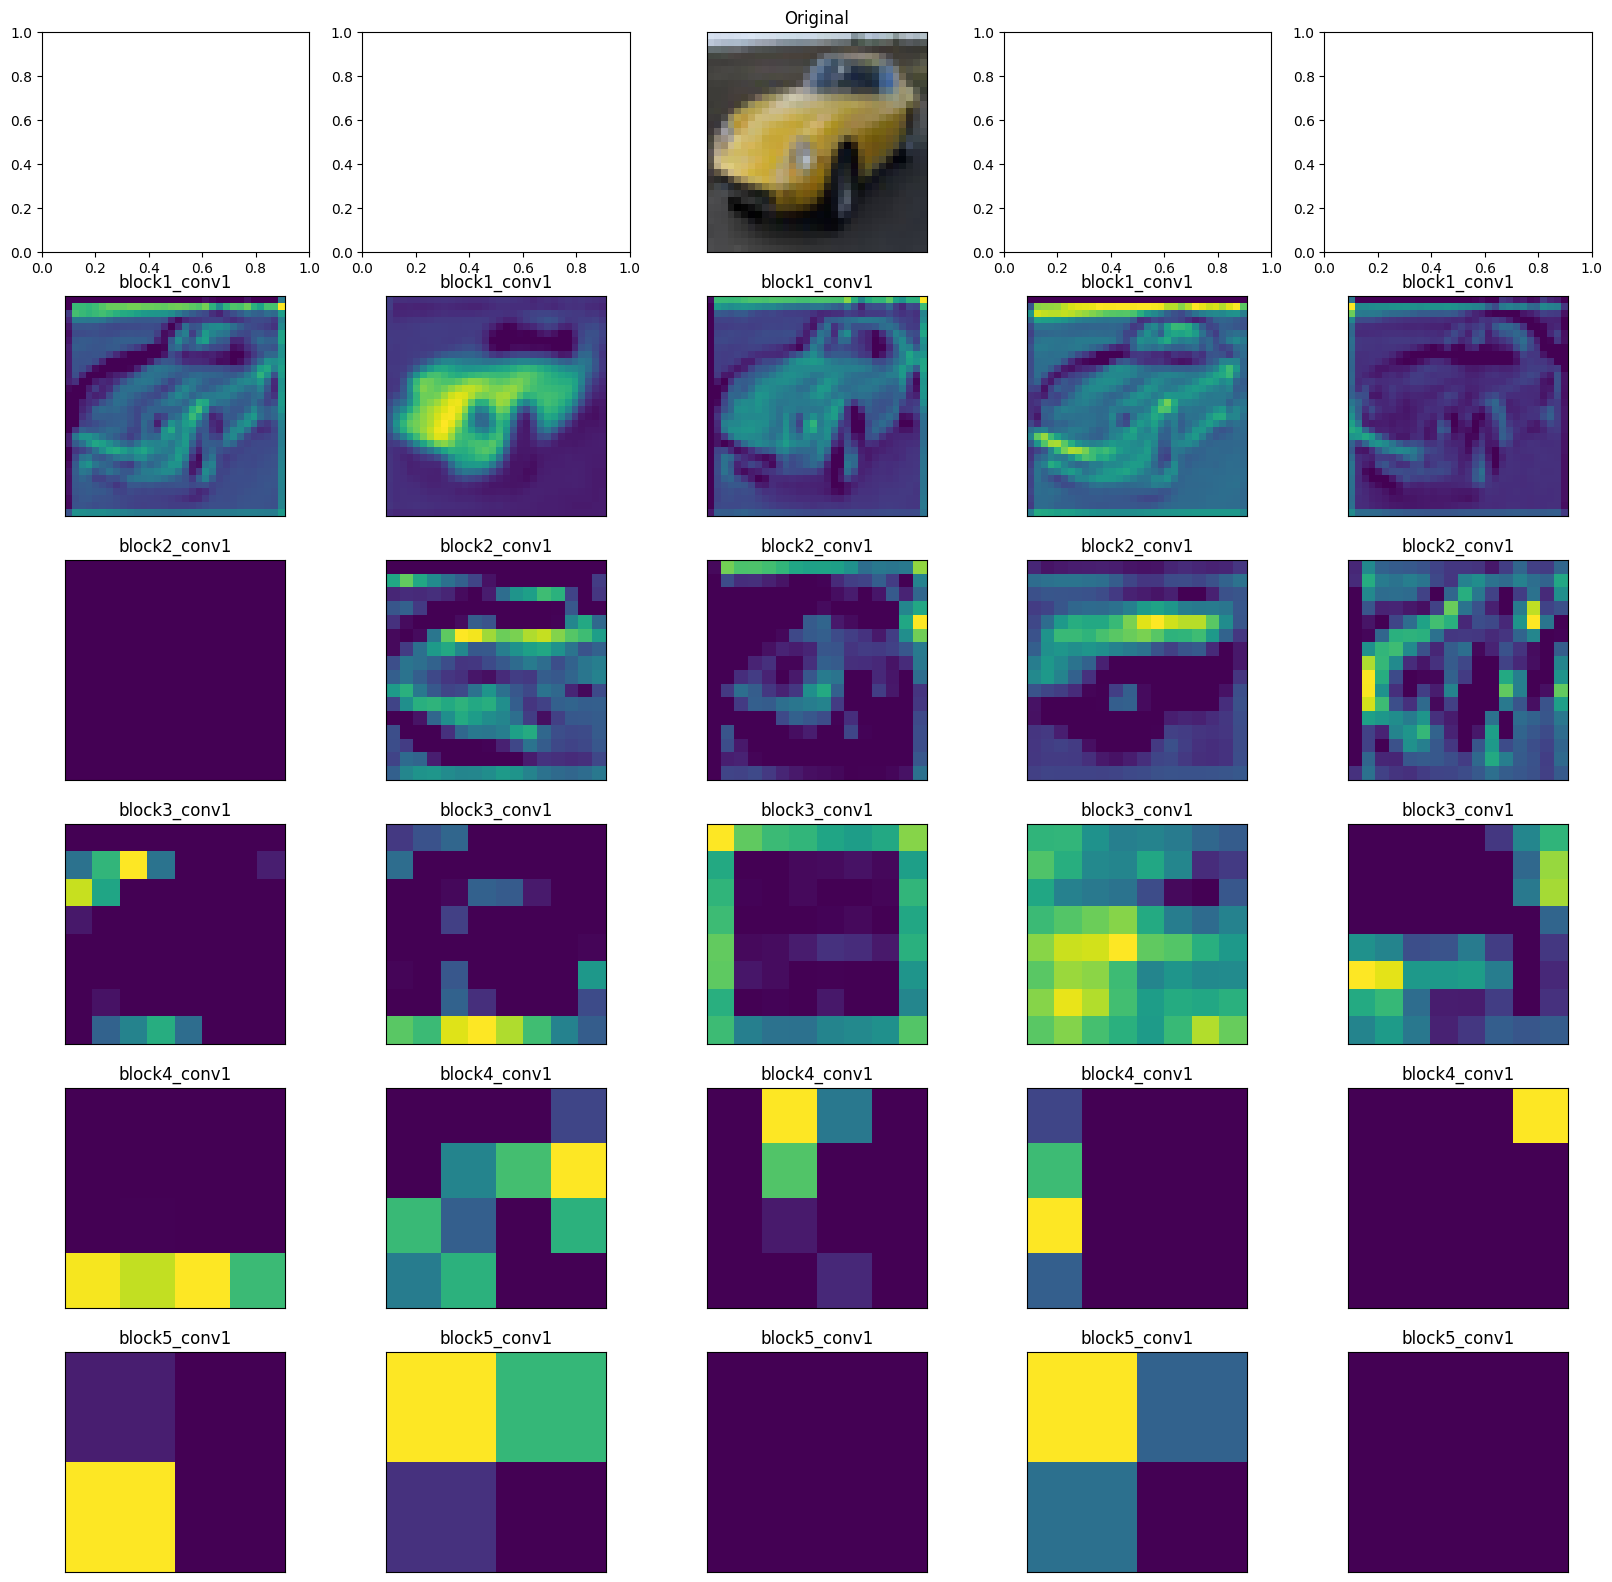

In [14]:
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.color import gray2rgb
from tensorflow.keras.models import Model

# Define the path to the input image
image_path = 'D:/MDS/2023/4th Tri-3/DLF/Ass2/DS_10283_3192/train/automobile/cifar10-train-184.png'

# Load the input image
image = plt.imread(image_path)

# Convert the input image to RGB format if it is grayscale
if image.ndim == 2:
    image = gray2rgb(image)


# Define the names of the layers from which to extract the output
layer_names = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']

# Define a list to store the outputs of each layer
outputs = []

# Reshape the input image to match the input shape of the VGG16 model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# Extract the output of each layer and append it to the outputs list
for layer_name in layer_names:
    intermediate_layer_model = Model(inputs=pretrained_model.input, outputs=pretrained_model.get_layer(layer_name).output)
    intermediate_output = intermediate_layer_model.predict(image)
    outputs.append(intermediate_output)

# Plot the original input image and the output of each layer
fig, ax = plt.subplots(nrows=len(layer_names)+1, ncols=5, figsize=(20, 20))

# Plot the original input image in the middle of the first row
ax[0][2].imshow(image[0])
ax[0][2].set_title('Original')
ax[0][2].set_xticks([])
ax[0][2].set_yticks([])

# Plot the output of each layer in subsequent rows
for i in range(len(layer_names)):
    for z in range(5):
        ax[i+1][z].imshow(outputs[i][0,:,:,z])
        ax[i+1][z].set_title(layer_names[i])
        ax[i+1][z].set_xticks([])
        ax[i+1][z].set_yticks([])

# Save the plot to a file
plt.savefig('layerwise_output.jpg')

# Show the plot
plt.show()

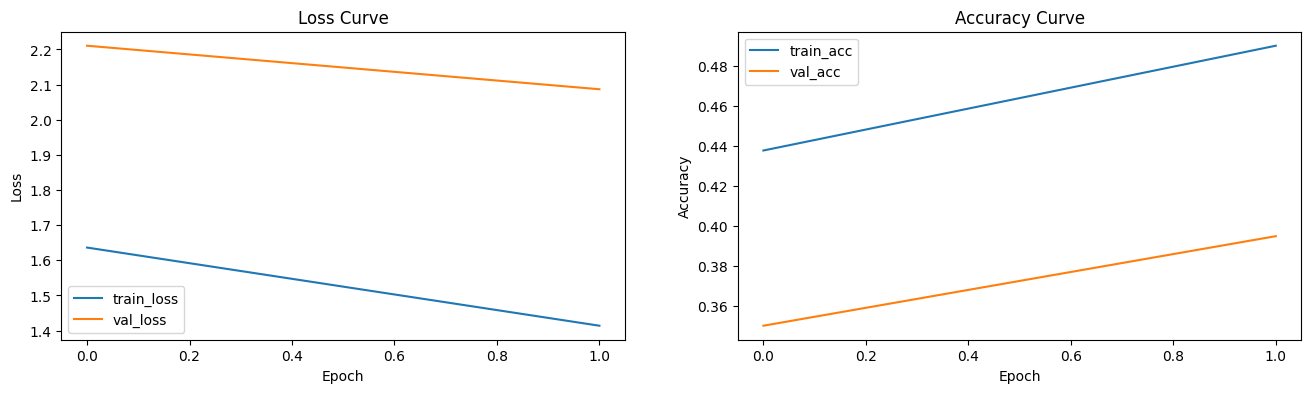

In [12]:
import matplotlib.pyplot as plt

# Assuming you have a 'history' object from your training
# Make sure to import 'plt' before using it

# Plot training & validation loss values
fig = plt.figure(figsize=(16, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(history.history['loss'], label='train_loss')
ax1.plot(history.history['val_loss'], label='val_loss')
ax1.set_title('Loss Curve')  # Changed 'ax.title' to 'ax1.set_title'
ax1.set_xlabel('Epoch')  # Changed 'ax.xlabel' to 'ax1.set_xlabel'
ax1.set_ylabel('Loss')  # Changed 'ax.ylabel' to 'ax1.set_ylabel'
ax1.legend()

# Create a new subplot for accuracy
ax2 = fig.add_subplot(1, 2, 2)  # Added this line to create a new subplot for accuracy
ax2.plot(history.history['accuracy'], label='train_acc')
ax2.plot(history.history['val_accuracy'], label='val_acc')
ax2.set_title('Accuracy Curve')  # Changed 'ax2.title' to 'ax2.set_title'
ax2.set_xlabel('Epoch')  # Changed 'ax2.xlabel' to 'ax2.set_xlabel'
ax2.set_ylabel('Accuracy')  # Changed 'ax2.ylabel' to 'ax2.set_ylabel'
ax2.legend()

plt.show()  # Moved this line to display both subplots together


In [14]:
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

predictions=vgg_model.predict(x_val)

y_pred_classes = np.argmax(predictions, axis=1)
y_true = np.argmax(y_val, axis=1)

confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=class_names, yticklabels=class_names)

NameError: name 'x_val' is not defined

In [ ]:
from tensorflow.keras.utils import plot_model

# Visualize the VGG model
plot_model(vgg_model, to_file='vgg_model.png', show_shapes=True, show_layer_names=True)